In [17]:
import numpy as np
import pandas as pd
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

_______________________________________________________________________________________________________________

## Bricolage


In [33]:
df = pd.read_csv('data/cardio_train.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
#drop id
#df = df.drop('id', axis=1)

# print(df)
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)
len(df)

55403

In [38]:
df[df['ap_lo']> df['ap_hi']].shape[0]
df['age'] = (df['age'] / 365).round().astype('int')

print(df.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0    0       2     168    62.0    110     80            1     1      0     0   
1    0       1     156    85.0    140     90            3     1      0     0   
2    0       1     165    64.0    130     70            3     1      0     0   
3    0       2     169    82.0    150    100            1     1      0     0   
4    0       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [39]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
df['age_group'] = pd.cut(df['age'], bins=7, labels=range(7), include_lowest=True,right=True)
df.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,0,2,168,62.0,110,80,1,1,0,0,1,0,3
1,0,1,156,85.0,140,90,3,1,0,0,1,1,3
2,0,1,165,64.0,130,70,3,1,0,0,0,1,3
3,0,2,169,82.0,150,100,1,1,0,0,1,1,3
4,0,1,156,56.0,100,60,1,1,0,0,0,0,3


In [40]:
df['bmi'] = df['weight']/((df['height']/100)**2)
df.head()

bmiMin = int(df['bmi'].min())
bmiMax = int(df['bmi'].max())

print(bmiMin, bmiMax)

df['bmi'] = pd.cut(df['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()


df["bmi"].value_counts(normalize=True)




17 43


1    0.430933
2    0.308666
3    0.156255
0    0.048553
4    0.048066
5    0.007527
Name: bmi, dtype: float64

In [41]:
df['map'] = ((2* df['ap_lo']) + df['ap_hi']) / 3

mapMin = int(df['map'].min())
mapMax = int(df['map'].max())

print(mapMin, mapMax)

df['map'] = pd.cut(df['map'], bins=6, labels=range(6), right=True, include_lowest=True)

df.head()

73 120


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2
1,0,1,156,85.0,140,90,3,1,0,0,1,1,3,4,4
2,0,1,165,64.0,130,70,3,1,0,0,0,1,3,1,2
3,0,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5
4,0,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


## Insulin

In [42]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['Insulin'] = np.random.randint(0, 847, size=len(df))


## Pregnancies


In [43]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['Pregnancies'] = np.random.randint(0, 17, size=len(df))


## glucose


In [44]:
# Définir une fonction pour générer des valeurs aléatoires en fonction de la catégorie
def generer_valeur_aleatoire(categorie):
    if categorie == 1:
        return np.random.randint(0, 100)
    elif categorie == 2:
        return np.random.randint(100, 126)
    elif categorie == 3:
        return np.random.randint(125, 200)

# Appliquer la fonction à la colonne "Glucose_categories"
df['Glucose_categories'] = df['gluc'].apply(generer_valeur_aleatoire)

In [45]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map,Insulin,Pregnancies,Glucose_categories
0,0,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2,837,2,93
1,0,1,156,85.0,140,90,3,1,0,0,1,1,3,4,4,84,16,75
2,0,1,165,64.0,130,70,3,1,0,0,0,1,3,1,2,170,2,65
3,0,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5,83,12,94
4,0,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0,495,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0,1,172,70.0,130,90,1,1,0,0,1,1,3,1,3,7,0,20
69994,0,1,165,80.0,150,80,1,1,0,0,1,1,3,2,3,278,9,11
69995,0,2,168,76.0,120,80,1,1,1,0,1,0,3,2,2,128,11,64
69998,0,1,163,72.0,135,80,1,2,0,0,0,1,3,2,3,480,10,100


## DiabetesPedigreeFunction



In [46]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['DiabetesPedigreeFunction'] = np.random.randint(0.078, 2.42, size=len(df))

## SkinThickness

In [47]:
# Ajouter une nouvelle colonne "Insulin" avec des valeurs aléatoires entre 0 et 846
df['SkinThickness'] = np.random.randint(0, 99, size=len(df))

## BloodPressure

In [48]:
df['BloodPressure'] =df['ap_lo']

In [49]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,cardio,age_group,bmi,map,Insulin,Pregnancies,Glucose_categories,DiabetesPedigreeFunction,SkinThickness,BloodPressure
0,0,2,168,62.0,110,80,1,1,0,0,...,0,3,1,2,837,2,93,1,65,80
1,0,1,156,85.0,140,90,3,1,0,0,...,1,3,4,4,84,16,75,1,79,90
2,0,1,165,64.0,130,70,3,1,0,0,...,1,3,1,2,170,2,65,0,49,70
3,0,2,169,82.0,150,100,1,1,0,0,...,1,3,2,5,83,12,94,1,28,100
4,0,1,156,56.0,100,60,1,1,0,0,...,0,3,1,0,495,7,5,1,87,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0,1,172,70.0,130,90,1,1,0,0,...,1,3,1,3,7,0,20,0,35,90
69994,0,1,165,80.0,150,80,1,1,0,0,...,1,3,2,3,278,9,11,0,87,80
69995,0,2,168,76.0,120,80,1,1,1,0,...,0,3,2,2,128,11,64,0,25,80
69998,0,1,163,72.0,135,80,1,2,0,0,...,1,3,2,3,480,10,100,0,41,80


In [50]:
df.rename(columns={'Glucose_categories': 'Glucose'}, inplace=True)

In [51]:
df.rename(columns={'bmi': 'BMI'}, inplace=True)
df.rename(columns={'age': 'Age'}, inplace=True)
df.rename(columns={'Glucose_categories': 'Glucose'}, inplace=True)

In [52]:
import joblib

# Load the trained model
model = joblib.load('knnmodele.pkl')

# Extract the relevant features from your DataFrame
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Make predictions
predictions = model.predict(features)

# Add the predictions as a new column to your DataFrame
df['Diabetes'] = predictions

# Display the updated DataFrame
print(df)


       Age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0        0       2     168    62.0    110     80            1     1      0   
1        0       1     156    85.0    140     90            3     1      0   
2        0       1     165    64.0    130     70            3     1      0   
3        0       2     169    82.0    150    100            1     1      0   
4        0       1     156    56.0    100     60            1     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993    0       1     172    70.0    130     90            1     1      0   
69994    0       1     165    80.0    150     80            1     1      0   
69995    0       2     168    76.0    120     80            1     1      1   
69998    0       1     163    72.0    135     80            1     2      0   
69999    0       1     170    72.0    120     80            2     1      0   

       alco  ...  age_group  BMI map Insulin Pregnancies  Gluco

In [53]:
tall=df['Diabetes']== 0
tall

0        False
1        False
2         True
3         True
4         True
         ...  
69993     True
69994     True
69995     True
69998     True
69999     True
Name: Diabetes, Length: 55403, dtype: bool

In [55]:
tall=len(df['Diabetes']== 0)
tall

55403

In [56]:
tall=len(df['Diabetes']== 1)
tall

55403

In [58]:
tall=len(df)
tall

55403

In [59]:
tall = len(df[df['Diabetes'] == 1])
tall

19982

In [60]:
tall = len(df[df['Diabetes'] == 0])
tall

35421

_____________________________________________________________________________________________________

In [61]:
df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'] ,axis=1)


,Age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
0,0,2,168,62.0,110,80,1,1,0,0,1,0,3,1,2,1
1,0,1,156,85.0,140,90,3,1,0,0,1,1,3,4,4,1
2,0,1,165,64.0,130,70,3,1,0,0,0,1,3,1,2,0
3,0,2,169,82.0,150,100,1,1,0,0,1,1,3,2,5,0
4,0,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,0,1,172,70.0,130,90,1,1,0,0,1,1,3,1,3,0
69994,0,1,165,80.0,150,80,1,1,0,0,1,1,3,2,3,0
69995,0,2,168,76.0,120,80,1,1,1,0,1,0,3,2,2,0
69998,0,1,163,72.0,135,80,1,2,0,0,0,1,3,2,3,0


In [75]:
df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'] ,axis=1)


,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
0,0,1,0,0,0,0,1,0,3,1,2,1
1,1,0,2,0,0,0,1,1,3,4,4,1
2,0,0,2,0,0,0,0,1,3,1,2,0
3,1,1,0,0,0,0,1,1,3,2,5,0
4,0,0,0,0,0,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,0,0,0,0,0,1,1,3,1,3,0
69994,0,0,0,0,0,0,1,1,3,2,3,0
69995,0,1,0,0,1,0,1,0,3,2,2,0
69998,0,0,0,1,0,0,0,1,3,2,3,0


	clusters	cholesterol	gluc	smoke	active	age_group	bmi	map

In [82]:
df

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Insulin,Pregnancies,Glucose,DiabetesPedigreeFunction,SkinThickness,BloodPressure,Diabetes
0,0,1,0,0,0,0,1,0,3,1,2,837,2,93,1,65,20,1
1,1,0,2,0,0,0,1,1,3,4,4,84,16,75,1,79,30,1
2,0,0,2,0,0,0,0,1,3,1,2,170,2,65,0,49,10,0
3,1,1,0,0,0,0,1,1,3,2,5,83,12,94,1,28,40,0
4,0,0,0,0,0,0,0,0,3,1,0,495,7,5,1,87,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,0,0,0,0,0,1,1,3,1,3,7,0,20,0,35,30,0
69994,0,0,0,0,0,0,1,1,3,2,3,278,9,11,0,87,20,0
69995,0,1,0,0,1,0,1,0,3,2,2,128,11,64,0,25,20,0
69998,0,0,0,1,0,0,0,1,3,2,3,480,10,100,0,41,20,0


In [84]:
df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction'], axis=1, inplace=True)
df.head()


,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
0,0,1,0,0,0,0,1,0,3,1,2,1
1,1,0,2,0,0,0,1,1,3,4,4,1
2,0,0,2,0,0,0,0,1,3,1,2,0
3,1,1,0,0,0,0,1,1,3,2,5,0
4,0,0,0,0,0,0,0,0,3,1,0,0


In [85]:
df.to_csv('cardio.csv', index=False)

In [86]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.describe()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
count,55403.000000,55403.000000,55403.000000,55403.000000,55403.000000,55403.000000,55403.000000,55403.000000,55403.0,55403.000000,55403.000000,55403.000000
mean,0.291374,0.345631,0.346100,0.218400,0.084508,0.051207,0.803910,0.487356,0.0,1.746927,2.429056,0.360666
std,0.454400,0.475578,0.666956,0.566398,0.278151,0.220421,0.397041,0.499845,0.0,0.988624,1.186621,0.480198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000,2.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,2.000000,3.000000,1.000000
max,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000,5.000000,1.000000


In [87]:
cost = []
num_clusters = range(1,6) # 1 to 5
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 5, verbose=0,random_state=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)


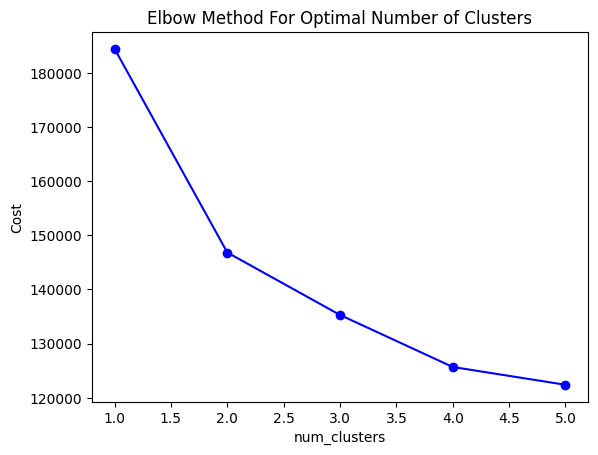

In [88]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [89]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5,random_state=1)
clusters = km.fit_predict(df)
clusters

array([0, 1, 0, ..., 0, 1, 0], dtype=uint16)

-------------------------------------------------------------------------------------------------------

In [96]:
df.insert(0,"clusters",clusters,True)

df.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
0,0,1,0,0,0,0,1,0,0,1,2,1
1,1,0,2,0,0,0,1,1,0,4,4,1
2,0,0,2,0,0,0,0,1,0,1,2,0
3,1,1,0,0,0,0,1,1,0,2,5,0
4,0,0,0,0,0,0,0,0,0,1,0,0


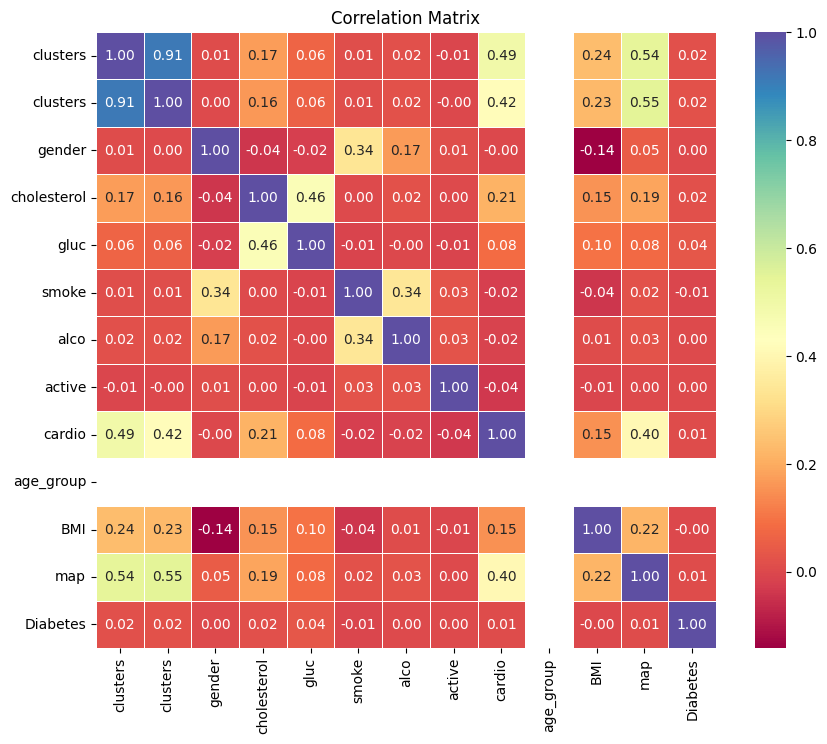

In [91]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

In [93]:
df

,clusters,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
0,0,0,1,0,0,0,0,1,0,0,1,2,1
1,1,1,0,2,0,0,0,1,1,0,4,4,1
2,0,0,0,2,0,0,0,0,1,0,1,2,0
3,1,1,1,0,0,0,0,1,1,0,2,5,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,1,0,0,0,0,0,1,1,0,1,3,0
69994,1,0,0,0,0,0,0,1,1,0,2,3,0
69995,0,0,1,0,0,1,0,1,0,0,2,2,0
69998,1,0,0,0,1,0,0,0,1,0,2,3,0


In [95]:
df.drop(['clusters'], axis=1, inplace=True)
df.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,BMI,map,Diabetes
0,1,0,0,0,0,1,0,0,1,2,1
1,0,2,0,0,0,1,1,0,4,4,1
2,0,2,0,0,0,0,1,0,1,2,0
3,1,0,0,0,0,1,1,0,2,5,0
4,0,0,0,0,0,0,0,0,1,0,0


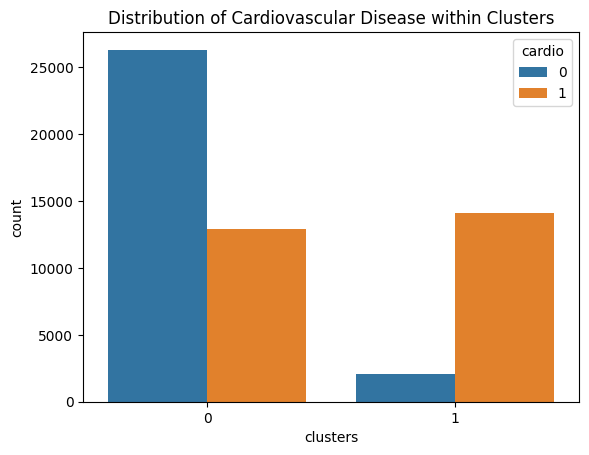

In [97]:
sns.countplot(x='clusters', hue='cardio', data=df)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()


In [100]:
x = df.drop(['cardio','gender','alco'], axis=1)
y = df['cardio']
x.head()

,clusters,cholesterol,gluc,smoke,active,age_group,BMI,map,Diabetes
0,0,0,0,0,1,0,1,2,1
1,1,2,0,0,1,0,4,4,1
2,0,2,0,0,0,0,1,2,0
3,1,0,0,0,1,0,2,5,0
4,0,0,0,0,0,0,1,0,0


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [102]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44322 entries, 26519 to 41680
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     44322 non-null  uint16
 1   cholesterol  44322 non-null  int64 
 2   gluc         44322 non-null  int64 
 3   smoke        44322 non-null  int64 
 4   active       44322 non-null  int64 
 5   age_group    44322 non-null  int64 
 6   BMI          44322 non-null  int64 
 7   map          44322 non-null  int64 
 8   Diabetes     44322 non-null  int64 
dtypes: int64(8), uint16(1)
memory usage: 3.1 MB


# **Random Forest**

Without CV

In [103]:
# build the model
rfModel = RandomForestClassifier(random_state=1)

# Fit the model
rfModel.fit(x_train, y_train)

# Make predictions
rf_pred = rfModel.predict(x_test)

# accuracy
rf_accuracy = metrics.accuracy_score(y_test, rf_pred)*100
print(f"Accuracy without CV: {rf_accuracy:.2f}")

Accuracy without CV: 74.68


In [104]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

#  Best parameters for RF
rf_best_params = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Create grid search
rf_gridsearch = GridSearchCV(estimator=rfModel,param_grid=rf_best_params, cv=5, scoring='accuracy',n_jobs=-1)

# Fit grid search
rf_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [10],
                         'n_estimators': [100]},
             scoring='accuracy')

In [105]:
best_params = rf_gridsearch.best_params_
best_estimator = rf_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Estimator  : RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=10,
                       random_state=1)


In [106]:
rf_pred_CV = best_estimator.predict(x_test)

Accuracy

In [107]:
rf_accuracy_cv = metrics.accuracy_score(y_test, rf_pred_CV)*100
print(f"Best Accuracy: {rf_accuracy_cv:.2f}")

Best Accuracy: 75.09


**Random Forest** Accuracy Scores

In [108]:
print(f"Random Forest accuracy without CV : {rf_accuracy:.2f}")
print(f"Random Forest accuracy with CV    : {rf_accuracy_cv:.2f}")

Random Forest accuracy without CV : 74.68
Random Forest accuracy with CV    : 75.09


**Classification Report**

In [109]:
classification_report_str = classification_report(y_test, rf_pred_CV, digits=4)

print("Classification Report for RF with CV:\n", classification_report_str)

Classification Report for RF with CV:
               precision    recall  f1-score   support

           0     0.7134    0.8628    0.7810      5705
           1     0.8128    0.6323    0.7112      5376

    accuracy                         0.7509     11081
   macro avg     0.7631    0.7475    0.7461     11081
weighted avg     0.7616    0.7509    0.7472     11081



# **MLP**

Without CV

In [110]:
# build MLP model
mlpModel = MLPClassifier(random_state=1)

# Fit the model
mlpModel.fit(x_train, y_train)

# Make predictions
mlp_pred = mlpModel.predict(x_test)

# accuracy
mlp_accuracy = metrics.accuracy_score(y_test, mlp_pred)*100
print(f"Accuracy without CV: {mlp_accuracy:.2f}")

Accuracy without CV: 75.10


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
# mlp_params = {
#     'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam'],
#     'max_iter': [100, 200, 300],
#     'alpha': [0.0001, 0.001, 0.01],
# }

# Best parameters for MLP
mlp_best_params = {
    'activation': ['tanh'],
    'alpha': [0.01],
    'hidden_layer_sizes': [(50, 50)],
    'max_iter': [300],
    'solver': ['adam'],
}

# Create grid search
mlp_gridsearch = GridSearchCV(estimator=mlpModel, param_grid=mlp_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
mlp_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=1), n_jobs=-1,
             param_grid={'activation': ['tanh'], 'alpha': [0.01],
                         'hidden_layer_sizes': [(50, 50)], 'max_iter': [300],
                         'solver': ['adam']},
             scoring='accuracy')

In [112]:
# mlp_best_params = mlp_gridsearch.best_params_
mlp_best_estimator = mlp_gridsearch.best_estimator_

print(f"Best Parameters : {mlp_best_params}")
print(f"Best Estimator  : {mlp_best_estimator}")

Best Parameters : {'activation': ['tanh'], 'alpha': [0.01], 'hidden_layer_sizes': [(50, 50)], 'max_iter': [300], 'solver': ['adam']}
Best Estimator  : MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(50, 50),
              max_iter=300, random_state=1)


In [113]:
mlp_pred_CV = mlp_best_estimator.predict(x_test)

Accuracy

In [114]:
mlp_accuracy_cv = metrics.accuracy_score(y_test, mlp_pred_CV)*100
print(f"Best Accuracy: {mlp_accuracy_cv:.2f}")

Best Accuracy: 75.35


**MLP** Accuracy Scores

In [115]:
print(f"MLP accuracy without CV : {mlp_accuracy:.2f}")
print(f"MLP accuracy with CV    : {mlp_accuracy_cv:.2f}")

MLP accuracy without CV : 75.10
MLP accuracy with CV    : 75.35


**Classification Report**

In [116]:
classification_report_str = classification_report(y_test, mlp_pred_CV, digits=4)

print("Classification Report for MLP with CV:\n", classification_report_str)

Classification Report for MLP with CV:
               precision    recall  f1-score   support

           0     0.7056    0.8941    0.7888      5705
           1     0.8432    0.6042    0.7039      5376

    accuracy                         0.7535     11081
   macro avg     0.7744    0.7491    0.7464     11081
weighted avg     0.7724    0.7535    0.7476     11081



# **SVM**

In [117]:
#Without CV build SVM model
svmModel = SVC(random_state=1)

# Fit the model
svmModel.fit(x_train, y_train)

# Make predictions
svm_pred = mlpModel.predict(x_test)

# accuracy
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)*100
print(f"Accuracy without CV: {svm_accuracy:.2f}")

Accuracy without CV: 75.10


In [118]:

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

svm_best_params = {
    'C': [10],
    'kernel': ['rbf'],
    'gamma': ['auto'],
}

# Create grid search
svm_gridsearch = GridSearchCV(estimator=svmModel, param_grid=svm_best_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit grid search
svm_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [10], 'gamma': ['auto'], 'kernel': ['rbf']},
             scoring='accuracy')

In [119]:
svm_best_params = svm_gridsearch.best_params_
svm_best_estimator = svm_gridsearch.best_estimator_

print(f"Best Parameters : {svm_best_params}")
print(f"Best Estimator  : {svm_best_estimator}")

Best Parameters : {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Estimator  : SVC(C=10, gamma='auto', random_state=1)


In [120]:
svm_pred_CV = svm_best_estimator.predict(x_test)

Accuracy

In [121]:
svm_accuracy_cv = metrics.accuracy_score(y_test, svm_pred_CV)*100
print(f"Best Accuracy: {svm_accuracy_cv:.2f}")

Best Accuracy: 74.76


In [122]:
print(f"SVM accuracy without CV : {svm_accuracy:.2f}")
print(f"SVM accuracy with CV    : {svm_accuracy_cv:.2f}")

SVM accuracy without CV : 75.10
SVM accuracy with CV    : 74.76


In [123]:
classification_report_str = classification_report(y_test, svm_pred_CV, digits=4)

print("Classification Report for SVM with CV:\n", classification_report_str)

Classification Report for SVM with CV:
               precision    recall  f1-score   support

           0     0.7037    0.8805    0.7822      5705
           1     0.8270    0.6066    0.6999      5376

    accuracy                         0.7476     11081
   macro avg     0.7654    0.7435    0.7410     11081
weighted avg     0.7635    0.7476    0.7423     11081



**Accuracy of all three models**

In [124]:
print(f"RF accuracy with CV    : {rf_accuracy_cv:.2f}")
print(f"MLP accuracy with CV   : {mlp_accuracy_cv:.2f}")
print(f"SVM accuracy with CV   : {svm_accuracy_cv:.2f}")

RF accuracy with CV    : 75.09
MLP accuracy with CV   : 75.35
SVM accuracy with CV   : 74.76


Text(0.5, 427.9555555555555, 'Predicted label')

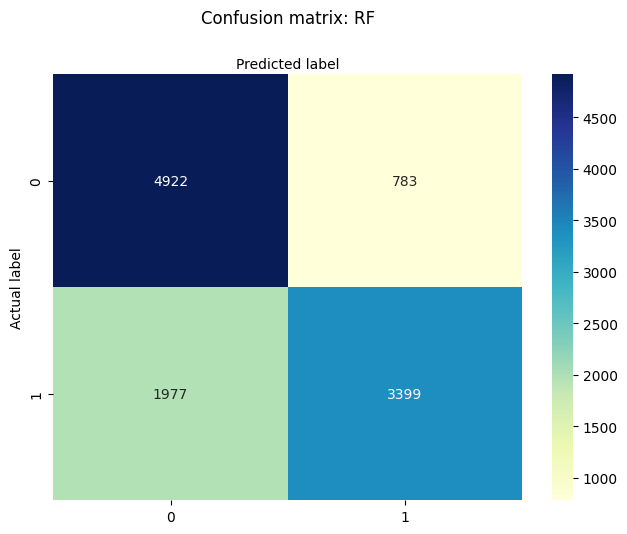

In [125]:
cnf_matrix = metrics.confusion_matrix(y_test, rf_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

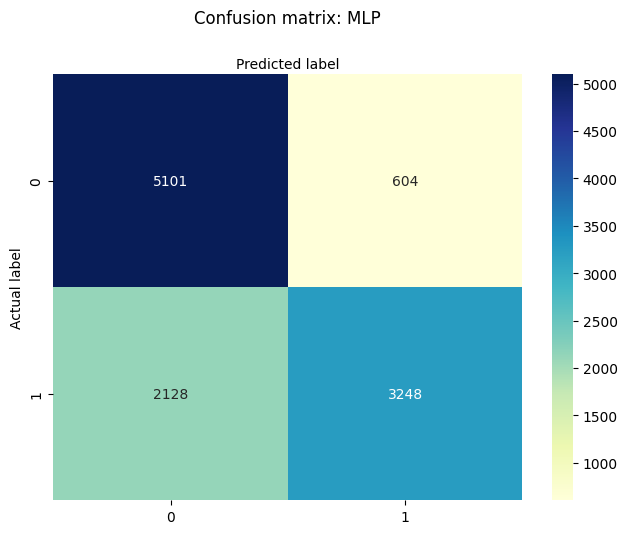

In [126]:
cnf_matrix = metrics.confusion_matrix(y_test, mlp_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: MLP', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 427.9555555555555, 'Predicted label')

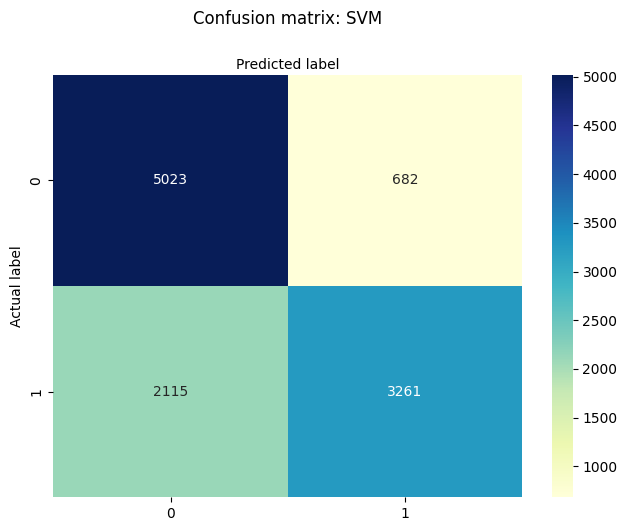

In [127]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_pred_CV)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

# Without CV build KNN model
knnModel = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins selon vos besoins

# Fit the model
knnModel.fit(x_train, y_train)

# Make predictions
knn_pred = knnModel.predict(x_test)

# Accuracy
knn_accuracy = metrics.accuracy_score(y_test, knn_pred) * 100
print(f"Accuracy without CV: {knn_accuracy:.2f}")


Accuracy without CV: 73.02


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Création du modèle k-NN
knnModel = KNeighborsClassifier()

# Définition des hyperparamètres à tester
knn_param_grid = {
    'n_neighbors': [ 5, 7,8,9,10,11,12,13,14],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Paramètres optimaux (à ajuster après l'exécution de la recherche)
knn_best_params = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'algorithm': ['auto']
}

# Création de la recherche sur grille (Grid Search)
knn_gridsearch = GridSearchCV(estimator=knnModel, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraînement de la recherche sur grille
knn_gridsearch.fit(x_train, y_train)

# Obtention des meilleurs paramètres
best_params = knn_gridsearch.best_params_
print("Meilleurs paramètres:", best_params)

# Obtention du meilleur estimateur
best_estimator = knn_gridsearch.best_estimator_
print("Meilleur estimateur:", best_estimator)

# Utilisation du meilleur modèle pour faire des prédictions
knn_pred = best_estimator.predict(x_test)

# Évaluation de la performance du modèle
knn_accuracy = metrics.accuracy_score(y_test, knn_pred) * 100
print(f"Précision avec la recherche sur grille: {knn_accuracy:.2f}")


C:\Users\talla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.71876336 0.71901155 0.72625381 0.72600562 0.73119484 0.73049542
 0.73022479 0.72997662 0.73056303 0.73035997 0.73155596 0.7312401
 0.73020227 0.73026995 0.73135296 0.73114988 0.73882058 0.73909129
 0.71880848 0.71912435 0.72688556 0.72618611 0.73081132 0.7307436
 0.73155601 0.73011201 0.73110454 0.73049534 0.73245845 0.73157853
 0.73074378 0.73036019 0.73245849 0.73121756 0.74039992 0.73924921
 0.71876336 0.71901155 0.72625381 0.72600562 0.73119484 0.73049542
 0.73022479 0.72997662 0.73056303 0.73035997 0.73155596 0.7312401
 0.73020227 0.73026995 0.73135296 0.73114988 0.73882058 0.73909129
        nan 0.72729129 0.72753944 0.72733635 0.73381186 0.73354108
 0.73196153 0.73146514 0.73611321 0.73622597 0.73724136 0.73708338
 0.74089633 0.74082857 0.73

Meilleurs paramètres: {'algorithm': 'brute', 'n_neighbors': 14, 'weights': 'uniform'}
Meilleur estimateur: KNeighborsClassifier(algorithm='brute', n_neighbors=14)
Précision avec la recherche sur grille: 71.00


## Arbre de decision

In [130]:
from sklearn.tree import DecisionTreeClassifier  # Importez DecisionTreeClassifier

# build the model
treeModel = DecisionTreeClassifier(random_state=1)  # Instanciez DecisionTreeClassifier

# Fit the model
treeModel.fit(x_train, y_train)  # Entraînez le modèle

# Make predictions
tree_pred = treeModel.predict(x_test)  # Faites des prédictions

# accuracy
tree_accuracy = metrics.accuracy_score(y_test, tree_pred) * 100
print(f"Accuracy without CV: {tree_accuracy:.2f}")  # Affichez l'exactitude


Accuracy without CV: 74.64


In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Paramètres de la grille pour l'arbre de décision
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
}

# Meilleurs paramètres pour l'arbre de décision
tree_best_params = {
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [1],
    'max_features': [None],
}

# Créez une recherche sur la grille
tree_gridsearch = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                               param_grid=tree_best_params,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

# Ajustez la recherche sur la grille
tree_gridsearch.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10], 'max_features': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [10]},
             scoring='accuracy')

In [134]:
best_params = tree_gridsearch.best_params_
best_estimator = tree_gridsearch.best_estimator_

print(f"Best Parameters : {best_params}")
print(f"Best Estimator  : {best_estimator}")

Best Parameters : {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Estimator  : DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=1)


In [135]:
tree_pred_CV = best_estimator.predict(x_test)

In [137]:
tree_accuracy_cv = metrics.accuracy_score(y_test, tree_pred_CV)*100
print(f"Best Accuracy: {tree_accuracy_cv:.2f}")

Best Accuracy: 74.91


**Arbre Tree** Accuracy Scores

In [138]:
print(f"Arbre Tree accuracy without CV : {tree_accuracy:.2f}")
print(f"Arbre Tree accuracy with CV    : {tree_accuracy_cv:.2f}")

Arbre Tree accuracy without CV : 74.64
Arbre Tree accuracy with CV    : 74.91


**Classification Report**

In [139]:
classification_report_str = classification_report(y_test, tree_pred_CV, digits=4)

print("Classification Report for Arbre Tree with CV:\n", classification_report_str)

Classification Report for Arbre Tree with CV:
               precision    recall  f1-score   support

           0     0.7184    0.8431    0.7758      5705
           1     0.7959    0.6494    0.7152      5376

    accuracy                         0.7491     11081
   macro avg     0.7572    0.7462    0.7455     11081
weighted avg     0.7560    0.7491    0.7464     11081



best_models = compare_models(cross_validation=True,
                            fold=5,
                            sort="Accuracy",
                            n_select=1,
                            )

In [ ]:
best_models = compare_models(cross_validation=True,
                            fold=5,
                            sort="Accuracy",
                            n_select=1,
                            )